# Data-Driven Interaction
## Testes estatísticos

In [1]:
!pip install ipyfilechooser --quiet
!apt-get install libgraphviz-dev -qq
!pip install pygraphviz --quiet
import pandas as pd
import numpy as np
import networkx as nx
import pygraphviz
import random

from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import levene, ranksums
from ipyfilechooser import FileChooser
from IPython.display import HTML, display, Image
from datetime import datetime

plt.style.use('fivethirtyeight')


Selecting previously unselected package libgtk2.0-common.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../0-libgtk2.0-common_2.24.32-1ubuntu1_all.deb ...
Unpacking libgtk2.0-common (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgtk2.0-0:amd64.
Preparing to unpack .../1-libgtk2.0-0_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgtk2.0-0:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgail18:amd64.
Preparing to unpack .../2-libgail18_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgail18:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libgail-common:amd64.
Preparing to unpack .../3-libgail-common_2.24.32-1ubuntu1_amd64.deb ...
Unpacking libgail-common:amd64 (2.24.32-1ubuntu1) ...
Selecting previously unselected package libxdot4.
Preparing to unpack .../4-libxdot4_2.40.1-2_amd64.deb ...
Unpacking libxdot4 (2.40.1-2) ...
Selecting previously unselected package libgvc6-plugins-gtk.
Prep

In [2]:
# Resultados de um teste
resultados = { 
    'Participante': [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70       
    ],
    'Tempo':[
        200, 322, 255, 283, 180, 229, 325, 306, 160, 335, 69, 170, 243, 348,
        191, 90, 187, 185, 123, 347, 213, 242, 327, 338, 319, 197, 240, 325,
        340, 213, 251, 153, 310, 212, 292, 358, 337, 183, 231, 300, 230, 403,
        167, 181, 289, 364, 411, 175, 331, 365, 385, 289, 214, 418, 317, 297,
        418, 132, 332, 328, 302, 165, 235, 225, 286, 179, 321, 404, 314, 413
    ],
    'Versão':[
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2
    ]
}

In [3]:
# Criando o data frame
df = pd.DataFrame( data = resultados )

# Para adicionar a leitura a partir de um CSV, comente a linha anterior
# e descomente as linhas abaixo:
#fc = FileChooser('/content');
#display(fc)
#df = pd.read_csv( fc.selected )

In [4]:
# Verificando se está tudo OK
df

,Participante,Tempo,Versão
0,1,200,1
1,2,322,1
2,3,255,1
3,4,283,1
4,5,180,1
...,...,...,...
65,66,179,2
66,67,321,2
67,68,404,2
68,69,314,2


In [5]:
# Visão geral dos dados da versão 1
v1 = df[ df['Versão'] == 1 ]
v1.Tempo.describe()

count     35.000000
mean     243.428571
std       77.160751
min       69.000000
25%      189.000000
50%      242.000000
75%      320.500000
max      348.000000
Name: Tempo, dtype: float64

In [6]:
# Visão geral dos dados da versão 2
v2 = df[ df['Versão'] == 2 ]
v2.Tempo.describe()

count     35.000000
mean     294.257143
std       85.197812
min      132.000000
25%      227.500000
50%      302.000000
75%      361.000000
max      418.000000
Name: Tempo, dtype: float64

(array([2., 1., 0., 4., 5., 4., 5., 2., 3., 9.]),
 array([ 69. ,  96.9, 124.8, 152.7, 180.6, 208.5, 236.4, 264.3, 292.2,
        320.1, 348. ]),
 <a list of 10 Patch objects>)

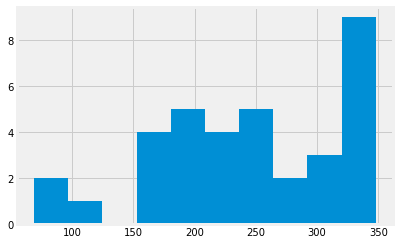

In [7]:
# Visualizando o histograma de tempo da versão 1
plt.hist( v1.Tempo )

(array([1., 6., 1., 4., 0., 6., 6., 2., 3., 6.]),
 array([132. , 160.6, 189.2, 217.8, 246.4, 275. , 303.6, 332.2, 360.8,
        389.4, 418. ]),
 <a list of 10 Patch objects>)

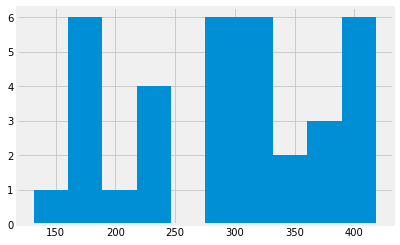

In [8]:
# Visualizando o histograma de tempo da versão 2
plt.hist( v2.Tempo )

{'boxes': [<matplotlib.lines.Line2D at 0x7fc91a1b8a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc91a1d4bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc91a687c50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc91a161290>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc91a1a7f50>,
  <matplotlib.lines.Line2D at 0x7fc9217052d0>]}

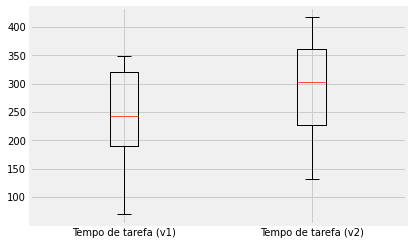

In [9]:
plt.boxplot( [v1.Tempo, v2.Tempo], labels=['Tempo de tarefa (v1)', 'Tempo de tarefa (v2)'] )

## Teste de normalidade

Na biblioteca SciPy, você pode interpretar o p-value da seguinte forma.
   
* p <= alpha: os dados não seguem uma distribuição normal (rejeita H0).
* p > alpha: os dados seguem uma distribuição normal (falha ao rejeitar H0).

Neste exemplo, vamos usar alpha = 0.05

In [10]:
# Teste de normalidade
shapiro_test = stats.shapiro( df.Tempo )

In [11]:
alpha = 0.05
if shapiro_test[1] <= alpha:
    print( 'Os dados não seguem uma distribuição normal (p-value={:.3f})'.format(shapiro_test[1]) )
else:
    print( 'Os dados seguem uma distribuição normal (p-value={:.3f})'.format(shapiro_test[1]) )

Os dados seguem uma distribuição normal (p-value=0.094)


In [12]:
# Teste de variância
levene_test = levene( v1.Tempo, v2.Tempo )

if levene_test.pvalue <= alpha:
    print( 'Pequeno p-value sugere que as populações NÃO têm a mesma variância (p-value={:.3f})'.format(levene_test.pvalue) )
else:
    print( 'Grande p-value sugere que as populações têm a mesma variância (p-value={:.3f})'.format(levene_test.pvalue) )


Grande p-value sugere que as populações têm a mesma variância (p-value=0.619)


## Escolhendo os testes estatísticos

* **Se os dados seguem uma distribuição normal: testes paramétricos**
    * Se precisar comparar condições entre 2 grupos: **Teste-T**
        * **Exemplo:** para comparar tempos de tarefa entre dois grupos.
    * Se precisar comparar 2 observações para cada participante: **Teste-T pareado**
        * **Exemplo:** para comparar se participantes reduziram o tempo de tarefa (curva de aprendizado).
    * Se precisar comparar 2+ condições para 2+ grupos: **ANOVA**
        * **Exemplo:** para comparar tempos de tarefa considerando tempo de experiência e dispositivos utilizados.
    * Se precisar comparar proporções de preferência: **Chi-quadrado**
        * **Exemplo:** para comparar preferências de usuários para uma determinada IU.
        
* **Se os dados NÃO seguem uma distribuição normal: testes não paramétricos**
  
    * Se precisar comparar condições entre 2 grupos: **Teste Wilcoxon rank-sum**
        * **Exemplo:** para comparar tempos de tarefa entre dois grupos.
    * Se precisar comparar 2 observações para cada participante: **Teste Wilcoxon signed-rank**
      * **Exemplo:** para comparar se participantes reduziram o tempo de tarefa (curva de aprendizado).
    * Se precisar comparar 2+ observações para cada participante: **Teste Friedman**
        * **Exemplo:** para comparar quando participantes experimentam 2+ opções de interface.
    * Se precisar comparar proporções de preferência: **Ordinal Logistic Regression**
        * **Exemplo:** para comparar preferências de usuários para uma determinada IU.
        

In [13]:
# Verificando se a diferença entre as médias é estatisticamente significativa (PARAMÉTRICO)
t_test = stats.ttest_ind( v1, v2, equal_var = True ) # Note que o equal_var=True com base no teste de Levene.
print( t_test )

Ttest_indResult(statistic=array([-14.28869017,  -2.61607547,         -inf]), pvalue=array([3.67609033e-22, 1.09491145e-02, 0.00000000e+00]))


In [14]:
# nível de significância
if( t_test.pvalue[0] <= alpha ):
  print( 'Diferença entre médias de tempo das versões 1 e 2 é estatisticamente significativa (p-value={:.3f})'.format(t_test.pvalue[0]) )
else:
  print( 'Diferença entre médias de tempo das versões 1 e 2 NÃO é estatisticamente significativa (p-value={:.3f})'.format(t_test.pvalue[0]) )

Diferença entre médias de tempo das versões 1 e 2 é estatisticamente significativa (p-value=0.000)


In [15]:
# Verificando se a diferença entre as médias é estatisticamente significativa (NÃO PARAMÉTRICO)
ranksum_result = ranksums( v1.Tempo, v2.Tempo )
print( ranksum_result )

RanksumsResult(statistic=-2.190646189420023, pvalue=0.02847740589684484)


In [16]:
if( ranksum_result.pvalue <= alpha ):
  print( 'Diferença entre médias de tempo das versões 1 e 2 é estatisticamente significativa (p-value={:.3f})'.format(t_test.pvalue[0]) )
else:
  print( 'Diferença entre médias de tempo das versões 1 e 2 NÃO é estatisticamente significativa (p-value={:.3f})'.format(t_test.pvalue[0]) )

Diferença entre médias de tempo das versões 1 e 2 é estatisticamente significativa (p-value=0.000)


## Análise de grafos

In [20]:
# Carregando o arquivo gerado pelo User Test Logger (Dump raw data)
fc = FileChooser('/content/sample_data');
display(fc)

FileChooser(path='/content/sample_data', filename='', title='HTML(value='', layout=Layout(display='none'))', s…

In [21]:
df_raw = pd.read_csv( fc.selected, header = 0 ) ;
df_raw

,Tab id,Referer,Timestamp,Event,Element Id,X Path,Which,Extra Info
0,8,https://www.google.com/,1623871433718,pageview,-,-,-,https://github.com/IBM/user-test-logger|1296x5196
1,8,https://www.google.com/,1623871433725,focusout,-,-,-,-
2,8,https://www.google.com/,1623871433725,blur,-,-,-,-
3,8,https://www.google.com/,1623871433725,focusout,-,-,-,-
4,0,-,1623871433727,pageview,-,-,-,moz-extension://994fd01d-ac51-bf4b-b365-2805a0...
...,...,...,...,...,...,...,...,...
1292,2,-,1623871453101,DOMNodeRemoved,-,/html/1/body/1/div/19/div/2/div/0/div/1/div/0/...,-,-
1293,2,-,1623871453102,DOMNodeInserted,-,/html/1/body/1/div/19/div/2/div/0/div/1/div/0/...,-,-
1294,0,-,1623871453494,mousedown,pause,/html/1/body/2/div/1/div/5,1,-
1295,0,-,1623871453500,mouseup,pause,/html/1/body/2/div/1/div/5,1,-


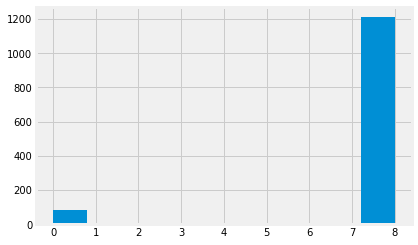

In [22]:
# Verificando quantidade de evento em cada aba do navegador
df_raw['Tab id'].hist()

In [23]:
# Gerando o grafo
G = nx.DiGraph() ;
prev_node = 'start'

for i, e in df_raw.iterrows():
  # Utilizando apenas eventos disparados em elementos com id definido
  if( e['Element Id'] != '-' ):
    node = e['Event'] + '@' + e['Element Id']
    G.add_node( prev_node, color = 'lightblue', style = 'filled' )
    G.add_node( node, color = 'lightblue', style = 'filled' )
  
    # Aresta já existe
    if( G.has_edge( prev_node, node ) ):
      G[ prev_node ][ node ][ 'weight' ] += 1
    else:
      G.add_edge( prev_node, node, weight = 1, alpha = 0.5 )  

    # Guardando referência para criar a próóxima aresta
    prev_node = node

# Adicionando o último nó da cadeia de eventos
G.add_node( 'end', color = 'lightblue', style = 'filled' )
G.add_edge( prev_node, 'end', weight = 1, alpha = 0.5 )  

In [24]:
# Informações sobre o grafo
print( nx.info( G ) )


Name: 
Type: DiGraph
Number of nodes: 40
Number of edges: 48
Average in degree:   1.2000
Average out degree:   1.2000


In [25]:
# Visualizing the graph using graphviz 
plt.figure( figsize = ( 32, 32 ) )
A = nx.nx_agraph.to_agraph( G )
A.layout( prog = 'dot' )
file_name = datetime.today().strftime('%Y%m%d') + '-graph.png'
A.draw( file_name , args = '-Gnodesep=0.01 -Gfont_size=1', prog = 'dot' ) 

<Figure size 2304x2304 with 0 Axes>

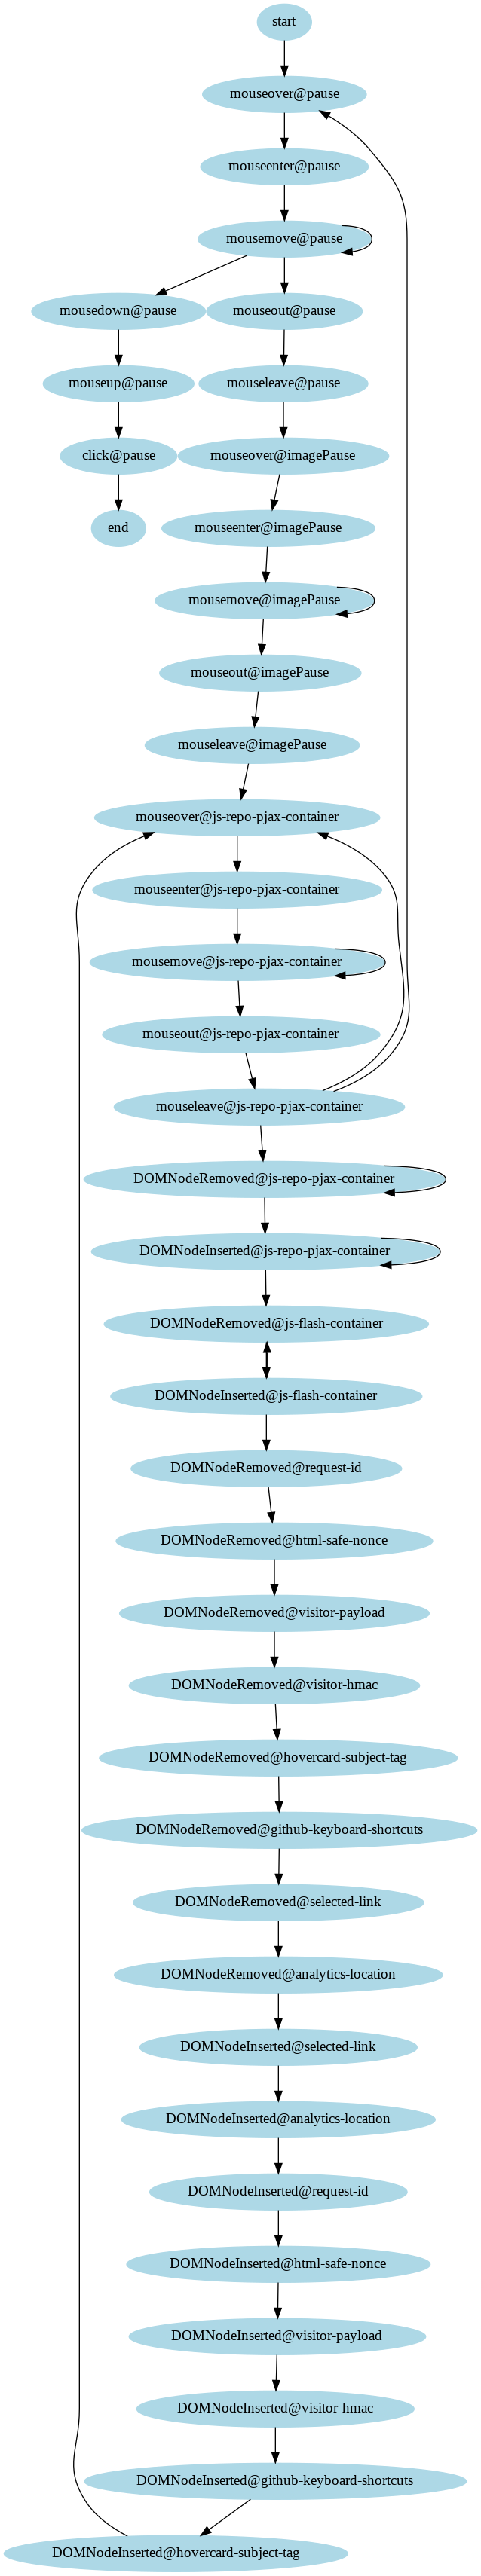

In [26]:
# Visualizando a imagem 
Image( file_name )